In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
Data = pd.read_csv('Data_Set.csv', encoding='latin-1')
Data

,x,y,z,d_x,d_y,d_z,fi,thetta,psi,d_fi,d_thetta,d_psi,Outcome
0,0.997670,0.981601,0.998441,0.052944,-0.047965,7.128634e-03,0.571426,0.546076,0.521865,-0.125533,-1.467266e-02,0.020927,1
1,1.020329,0.950854,0.992265,-0.119771,0.051500,-8.470898e-02,0.527034,0.545367,0.526761,-0.854249,-4.746782e-01,-0.108012,1
2,0.998375,0.925627,0.978745,0.095955,-0.200215,-1.934203e-02,0.658326,0.593212,0.511661,0.281087,2.184650e-01,0.024043,1
3,0.999966,0.999860,1.000000,0.000034,0.000140,3.270000e-06,0.523584,0.523602,0.523572,0.000014,-3.500000e-06,0.000028,0
4,0.993500,1.017797,1.003141,-0.040797,0.087278,7.832640e-04,0.461181,0.488679,0.522015,-0.126420,-9.636526e-02,-0.018234,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.999994,0.999975,1.000001,0.000006,0.000025,-5.180000e-07,0.523596,0.523599,0.523594,0.000003,-6.330000e-07,0.000005,0
2996,1.009543,0.932728,0.981340,0.105567,0.058712,7.204397e-02,0.597430,0.572295,0.516777,-0.451441,-1.404950e-01,0.080352,1
2997,0.943965,0.765865,0.839400,0.045964,0.248803,1.747927e-01,0.491444,0.525981,0.461448,0.047479,-2.290165e-03,0.064706,0
2998,0.999069,0.996193,0.999261,0.000932,0.003805,1.119337e-03,0.523212,0.523694,0.522762,0.000386,-9.500000e-05,0.000873,0


In [88]:
del Data['Outcome']
Data.head()

,x,y,z,d_x,d_y,d_z,fi,thetta,psi,d_fi,d_thetta,d_psi
0,0.997670,0.981601,0.998441,0.052944,-0.047965,0.007129,0.571426,0.546076,0.521865,-0.125533,-0.014673,0.020927
1,1.020329,0.950854,0.992265,-0.119771,0.051500,-0.084709,0.527034,0.545367,0.526761,-0.854249,-0.474678,-0.108012
2,0.998375,0.925627,0.978745,0.095955,-0.200215,-0.019342,0.658326,0.593212,0.511661,0.281087,0.218465,0.024043
3,0.999966,0.999860,1.000000,0.000034,0.000140,0.000003,0.523584,0.523602,0.523572,0.000014,-0.000004,0.000028
4,0.993500,1.017797,1.003141,-0.040797,0.087278,0.000783,0.461181,0.488679,0.522015,-0.126420,-0.096365,-0.018234


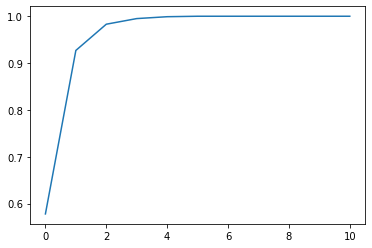

In [89]:
# Метод главных компонент PCA - уменьшаем размерность данных
data_numpy = Data.to_numpy() # Конвертация в numpy массив
data_features = data_numpy[:,:12]

from sklearn.decomposition import PCA

pca = PCA(n_components = 11, svd_solver='full') #Создание объекта класса PCA. В качестве параметров выступает количество ГК и метод оптимизации
#data_features_transformed = pca.fit(data_features).transform(data_features) # С учетом 11 компонент
data_features_transformed = pca.fit(data_features)

# Найдем долю объясненной дисперсии в зависимости от количества используемых ГК.
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)

# Построим график зависимости доли объясненной дисперсии от количества используемых ГК
plt.plot(np.arange(11), explained_variance, ls = '-')

In [90]:
# Преобразованный массив признаков по методу PCA
pca = PCA(n_components = 4, svd_solver='full') 
data_features_transformed = pca.fit(data_features).transform(data_features) # С учетом 3 компонент
data_features = pd.DataFrame(data_features_transformed) # из numpy --> pandas 
data_features

,0,1,2,3
0,-0.216627,-0.081210,0.153932,-0.017365
1,-0.960368,0.281878,0.195499,0.295213
2,0.205735,-0.313994,0.188507,-0.152505
3,-0.152854,-0.163970,0.038925,-0.000660
4,-0.303291,-0.088900,-0.025395,0.080958
...,...,...,...,...
2995,-0.152904,-0.164085,0.039012,-0.000651
2996,-0.462543,0.209675,0.198481,-0.025254
2997,0.026077,0.162566,-0.180739,-0.019578
2998,-0.150940,-0.159757,0.036079,-0.001007


In [91]:
# Нормализация данных
from sklearn import preprocessing
normalization = preprocessing.StandardScaler()
normalization.fit(data_features)
data_features = normalization.transform(data_features)
data_features = pd.DataFrame(data = data_features)  # Перевод из numpy ---> pandas
data_features

,0,1,2,3
0,-0.369059,-0.177776,0.848518,-0.204316
1,-1.636139,0.617054,1.077645,3.473408
2,0.350502,-0.687359,1.039106,-1.794336
3,-0.260411,-0.358943,0.214568,-0.007765
4,-0.516705,-0.194610,-0.139982,0.952530
...,...,...,...,...
2995,-0.260496,-0.359194,0.215043,-0.007665
2996,-0.788015,0.458996,1.094083,-0.297134
2997,0.044426,0.355870,-0.996285,-0.230356
2998,-0.257151,-0.349721,0.198880,-0.011842


In [108]:
# Класетризация DBSCAN
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps = 0.9, min_samples = 3).fit(data_features)
labels = clustering.labels_

In [109]:
# Суммарное число кластеров
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

2

In [110]:
# for new dataset
x = clustering.fit_predict(data_features)
print(x)

[0 0 0 ... 0 0 0]


In [111]:
g = 0
zeros = [g for i in x if i == 0]
len(zeros)

2964

In [112]:
g = 0
units = [g for j in x if j !=0]
len(units)

36